In [6]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import torch

from transformations.transform import WaveformToInput as TorchTransform
from architecture.backend.yamnet.params import YAMNetParams
from architecture.backend.yamnet.model import yamnet
from architecture.backend.yamnet.model import yamnet_category_metadata

from architecture.classifier.classification import Classifier

from datasets.SvdExDataset import SvdCutOffShort
from IPython.lib.display import Audio

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
def sf_load_from_int16(fname):
    x, sr = sf.read(fname, dtype='int16', always_2d=True)
    x = x / 2 ** 15
    x = x.T.astype(np.float32)
    return x, sr


waveforms, sr = sf_load_from_int16('2485-i_l.wav')
mean = waveforms.mean(axis=1)
variance = waveforms.var(axis=1)
noise = np.random.normal(mean,variance,50000-waveforms.shape[1])/10
noise = noise.reshape(1,noise.shape[0])
signal=np.concatenate((waveforms,noise),axis=1)
waveform_for_torch = torch.tensor(signal)
patches, spectrogram = TorchTransform().wavform_to_log_mel(waveform_for_torch, 44100)
patches.shape


RuntimeError: expected scalar type Double but found Float

[[[7.36551786e-03 2.63029324e-03 4.08013781e-03 ... 2.18742898e-08
   1.55901064e-07 1.14845799e-10]
  [8.73532872e-01 1.67795450e-01 8.16124348e-01 ... 1.02674091e-06
   6.56418328e-07 1.86546010e-06]
  [1.08253161e-01 5.43740112e-02 7.37593606e-02 ... 3.97664030e-06
   3.85971188e-07 7.40170649e-07]
  ...
  [1.43044996e-08 2.00216036e-07 4.89723644e-08 ... 5.02833565e-07
   2.15622322e-06 4.39855359e-07]
  [1.18279579e-07 1.36103163e-07 4.54418373e-08 ... 2.40576151e-06
   2.79630030e-07 7.43766393e-07]
  [3.79336597e-08 8.76337493e-11 9.28054467e-09 ... 5.78130393e-08
   9.99445703e-08 4.82095910e-07]]]


(0.0, 2e-05)

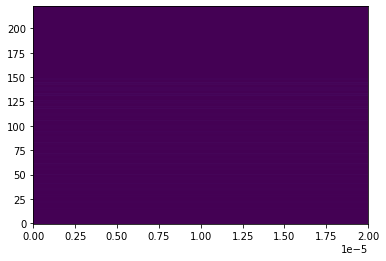

In [70]:
from scipy.signal import spectrogram
spec = spectrogram(signal)
print(spec[2])
spec = spec[2][0,:,:]

# extent = (0, spec.shape[0], -0.5, spec.shape[1] - 0.5)
plt.imshow(spec.T, aspect='auto', interpolation='nearest', origin='lower')
plt.xlim([0, len(signal) / sr ])

